# **Análise de Dados de crédito.**

Uma instituição financeira está interessada em levantar os dados dos clientes que estão inadimplentes e adimplentes.
Nesse caso, precisamos levantar os dados para entregar os motivos do cliente não honrar com suas dívidas, puxando análises por meio de informações como salário, escolaridade e movimentação financeira.

# Importação de Bibliotecas

Em primeiro lugar, precisamos importar todos os recursos e bibliotecas do Python que usaremos nesta análise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exploração de Dados

Com as bibliotecas importadas, precisamos ler a base de dados (que está em formato .csv) usando um recurso da biblioteca Pandas

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fabio-stampone/EBAC/main/Python_M10_support%20material.csv', na_values = 'na')

Para ter certeza de que puxamos a base de dados corretamente, iremos realizar uma chamada das primeiras 10 linhas de informação.

In [3]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Na base de dados, temos uma coluna chamada "default". Através dos dados dessa coluna, iremos definir se o cliente é adimplente(default = 0) ou inadimplente (default = 1)

# Estrutura

Conforme exibido, os dados foram puxados com sucesso.
Vamos usar um comando que irá nos retornar a quantidade de linhas e culunas 

In [4]:
df.shape

(10127, 16)

Podemos aplicar um filtro para verificar a quantidade de clientes que estão adimplentes

In [5]:
df[df['default'] == 0].shape

(8500, 16)

Também faremos o mesmo para os clientes inadimplentes

In [6]:
df[df['default'] == 1].shape

(1627, 16)

Podemos levantar os dados gerais da quantidade total de pessoas, e das divisões entre adimplentes e inadimplentes.

In [7]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [8]:
print(f"A proporcão clientes adimplentes é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


# Esquema de dados

In [9]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Para ter uma visão melhor sobre os dados que estamos operando, é interessante puxar as colunas e os respectivos tipos de dados.

In [10]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

Podemos também, filtrar os dados pelos tipos dos quais são pertencentes.

In [11]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


Também podemos selecionar apenas os dados considerados números inteiros.

In [12]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


# Dados Faltantes

Um dos maiores problemas de nossa base de dados, é que alguns dados estão em falta, fazendo com que a leitura e análise não seja tão acurada.
Dados faltantes podem ser categorizados entre:

* Vazios ("")
* Nulos (None)
* Não disponíveis ou aplicáveis (na, NA, etc.)
* Não numérico (nan, NaN, NAN, etc.)

Podemos consultar quais colunas possuem dados faltantes.

In [13]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

No caso, os dados de "escolaridade", "estado_civil" e "salario_anual" estão com dados faltantes.

A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [14]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col:
                {
                    'quantidade': qtd,
                    "porcentagem": round(100 * qtd/total, 2)
                }
            }
            stats_dados_faltantes.append(dict_dados_faltantes)
            
    for stat in stats_dados_faltantes:
        print(stat)


O código abaixo imprimirá as estatísticas de dados faltantes para cada coluna no DataFrame

In [15]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


A linha de código abaixo vai calcular e imprimir as estatísticas de dados faltantes apenas para as linhas em que a coluna 'default' tem o valor 0, ou seja, retornará a quantidade de clientes adimplentes.

In [16]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


Ja a linha de código abaixo fará a mesma coisa, apenas irá filtrar os dados onde 'default' tem o valor 1, ou seja, retornará a quantidade de clientes inadimplentes.

In [17]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# Transformação e Limpeza de dados

Após realizar o esquema dos dados e a leitura mais aprofundada dos mesmos, precisamos transformar e limpar o conjunto de dados para que possamos analizálos da melhor forma. Para isso, usaremos um método chamado *data wrangling*.
Iremos realizar:

* Correção do esquema de dados das colunas
* Remover os dados faltantes

**Correção de Esquema**

Na etapa de exploração, notamos que as colunas limite_credito e valor_transacoes_12m
estavam sendo interpretadas como colunas categóricas ( dtype = object ).

In [18]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [19]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função lambda para limpar os dados. Mas antes, vamos testar sua
aplicação através do método funcional map :

In [20]:
fn = lambda valor: float(str(valor).replace(".", "").replace(",", "."))

valores_originais = [
    '12.691,51',
    '8.256,96',
    '3.418,56',
    '3.313,03',
    '4.716,22',
    12345.67  # Adicionando um valor float à lista
]

valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)


['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22', 12345.67]
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22, 1234567.0]


Com a função lambda de limpeza pronta, basta aplica-la nas colunas de interesse.

In [21]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o esquema

In [22]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

Veja que agora as colunas "valor_transacoes_12m" e "qtd_transacoes_12m" são do tipo float.

In [23]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [24]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


**Remoção de dados faltantes**

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é
trivial.

In [25]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [26]:
df.shape

(7081, 16)

In [27]:
df[df['default'] == 0].shape

(5968, 16)

In [28]:
df[df['default'] == 1].shape

(1113, 16)

In [29]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [30]:
print(f"A proporcão adimplentes ativos é de " + \
 f"{round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes adimplentes é de " + \
       f"{round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%"
 )
print("")
print(f"A proporcão clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )
print(f"A nova proporcão de clientes inadimplentes é de " + \
 f"{round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%"
 )

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# Visualização de Dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis
explicativas com a variável resposta para buscar entender qual fator leva um cliente a
inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base
de adimplentes e inadimplentes.

In [31]:
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

1. **Visualizações categóricas**

Nesta seção, vamos visualizar a relação entre a variável resposta default com os atributos
categóricos.

In [32]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* Estado Civil dos Clientes

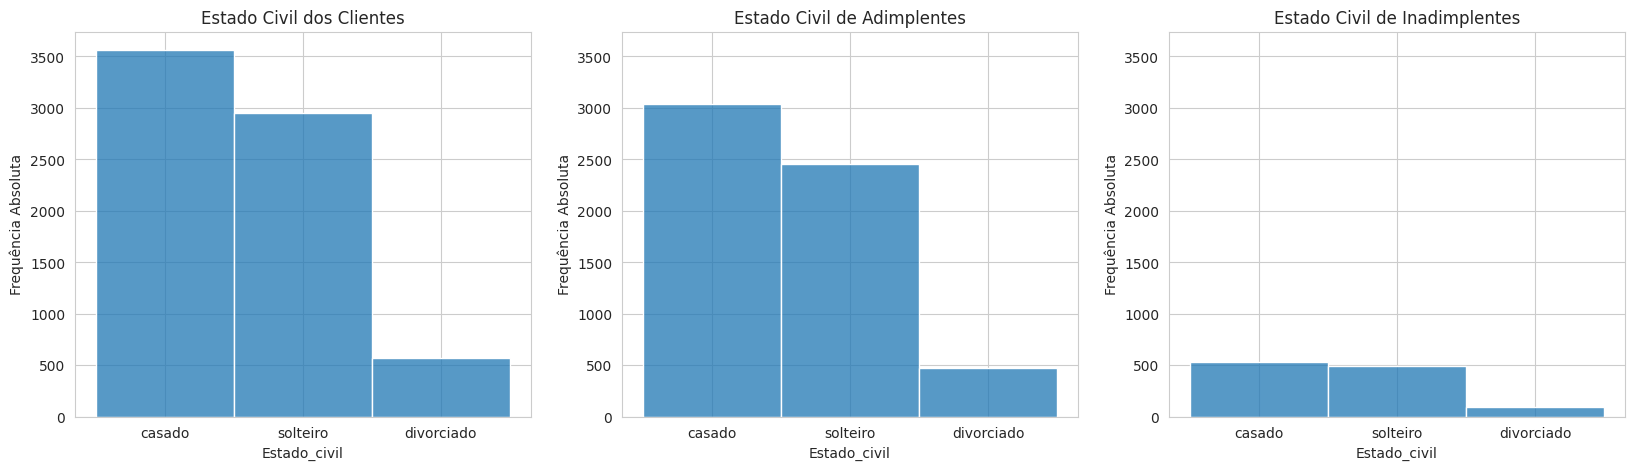

In [33]:
coluna = 'estado_civil'
titulos = ['Estado Civil dos Clientes', 'Estado Civil de Adimplentes', 'Estado Civil de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* Tipo de Cartão

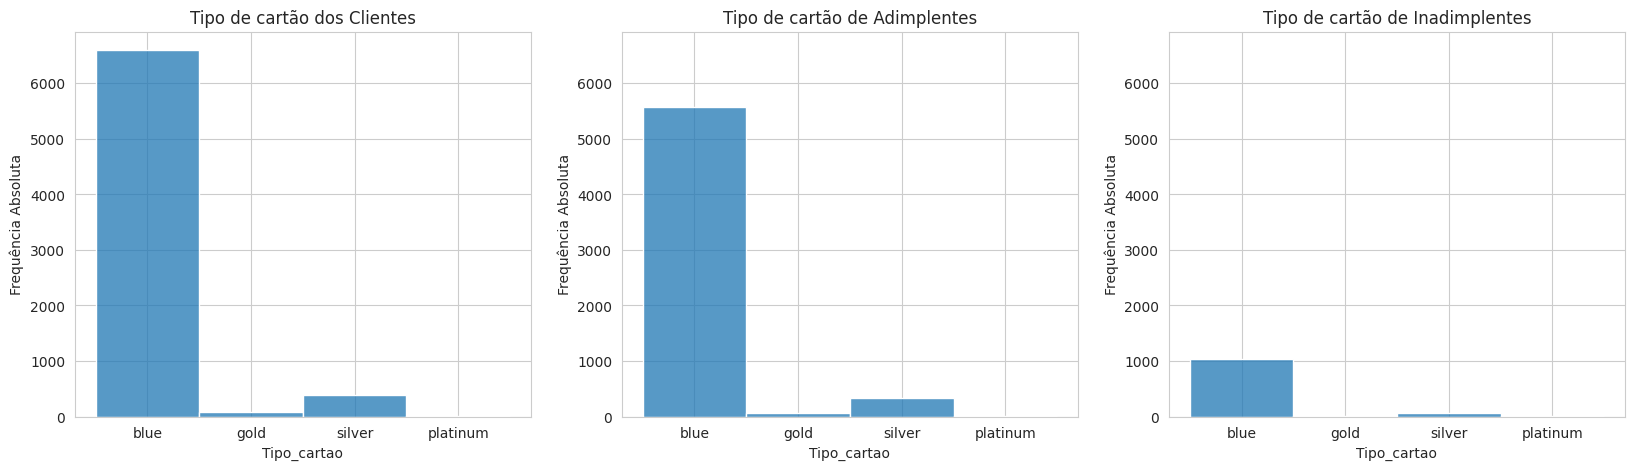

In [34]:
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos Clientes',
           'Tipo de cartão de Adimplentes', 
           'Tipo de cartão de Inadimplentes'
          ]

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

**2. Visualizações Numéricas**

Agora, iremos ver a relação entre a variavel resposta default com os atributos numéricos

In [35]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


Quantidade das transações nos Últimos 12 Meses

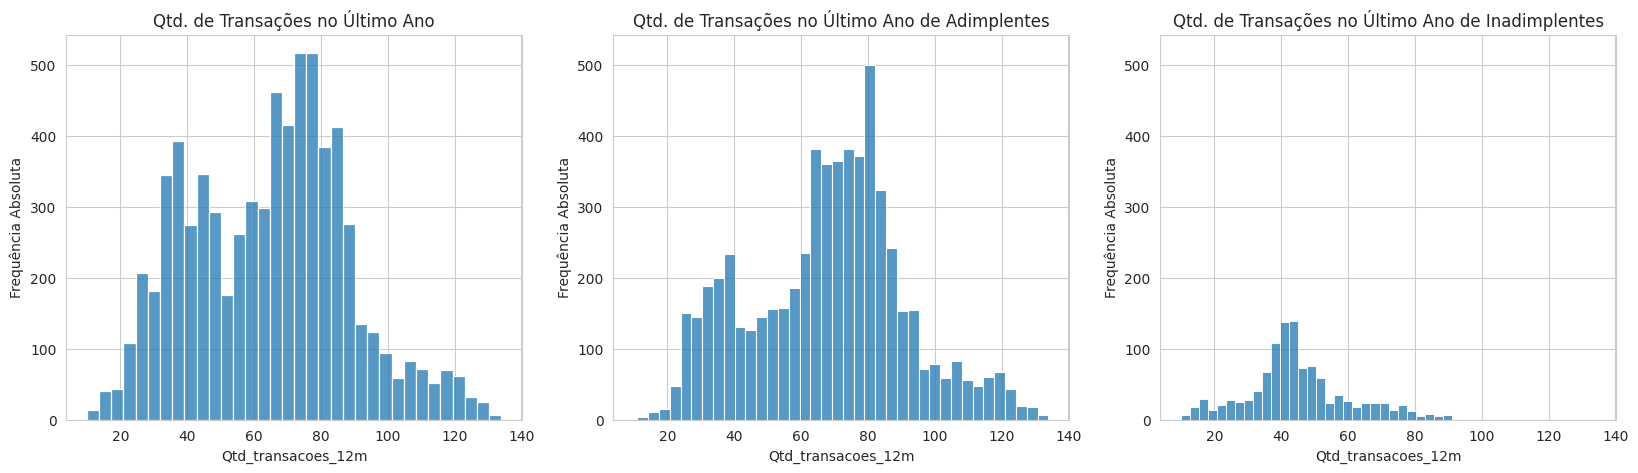

In [36]:
coluna = 'qtd_transacoes_12m'
titulos = [
    'Qtd. de Transações no Último Ano',
    'Qtd. de Transações no Último Ano de Adimplentes',
    'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(
        title=titulos[eixo],
        xlabel=coluna.capitalize(),
        ylabel='Frequência Absoluta'
    )
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1
    
figura.show()

Valor das Transações nos Últimos 12 Meses

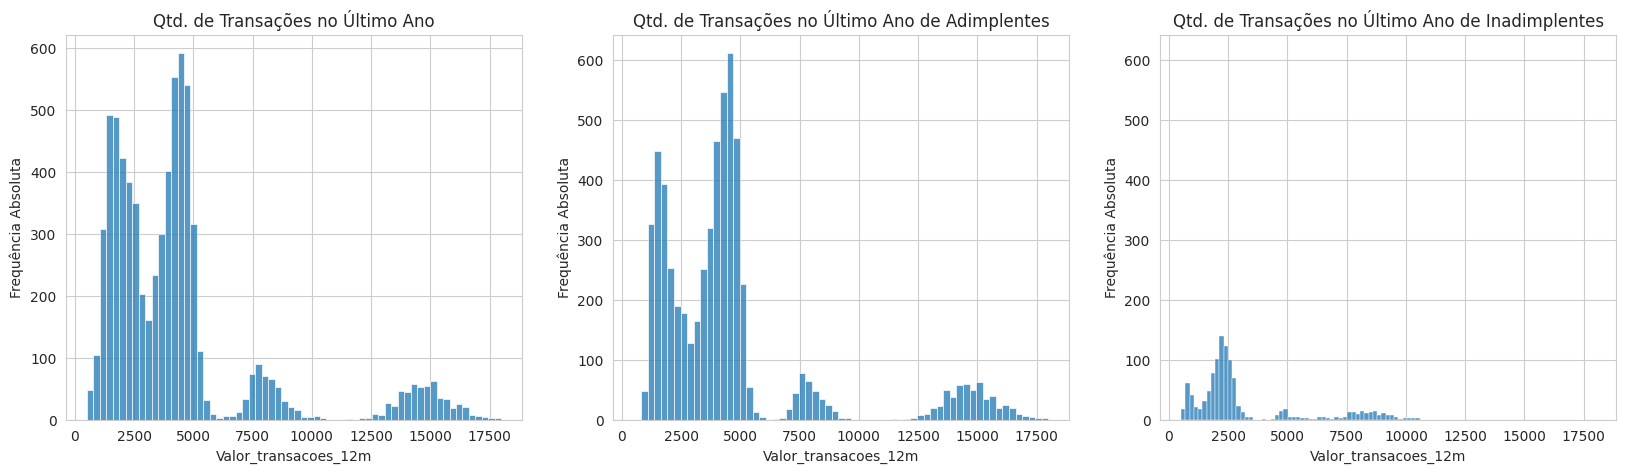

In [37]:
coluna = 'valor_transacoes_12m'
titulos = [
    'Qtd. de Transações no Último Ano',
    'Qtd. de Transações no Último Ano de Adimplentes',
    'Qtd. de Transações no Último Ano de Inadimplentes'
]
eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_adimplente, df_inadimplente]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(
        title=titulos[eixo],
        xlabel=coluna.capitalize(),
        ylabel='Frequência Absoluta'
    )
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))
    
    eixo += 1
    
figura.show()

3. Valor de Transações nos Últimos 12 Meses x Quantidade de Transções nos Últimos 12 Meses

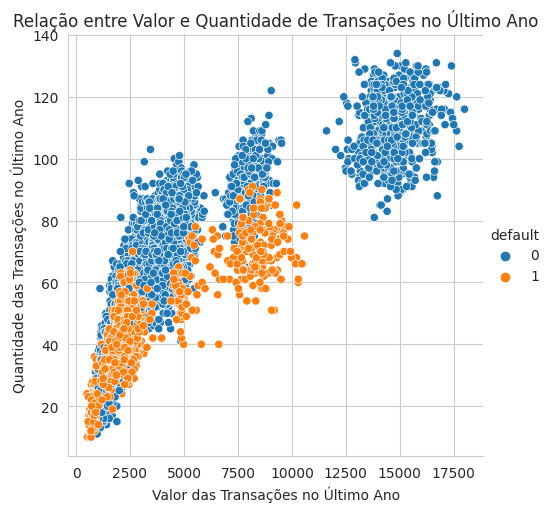

In [38]:
f = sns.relplot(
    x='valor_transacoes_12m',
    y='qtd_transacoes_12m',
    data=df,
    hue='default'
)

_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
)

-----------------------------------------------------------------------------

# Insights sobre a análise

Os dados analisados foram tratados de forma que todos os valores vazios foram substituidos por valores computáveis, levando em conta que para tratar os dados em sua totalidade precisamos de parcialidade e exatidão.

No início do projeto, fizemos a leitura de todos os dados e analisamos para saber quais os tipos de análises precisaríamos realizar. 

Ao realizar a montagem dos dados na etapa de Transformação e Limpeza, fizemos o uso dos schemas para tratar os dados com maior fluidez, atribuindo a cada um deles um tipo exato e determinante. Podemos inclusive, ver um calculo da porcentagem de clientes adimplentes e inadimplentes após a remoção dos dados em falha.

Por último, na etapa de visualização, usamos as ferramentas poderosas de montagem e plotagem de gráficos do Python, diretamente da biblioteca Seaborn.
Fiz diferentes análises de diferentes tipos de dados, unificando duas comparações no final para exibir os dados de forma geral e esquematizada.

--------------------

# Considerações Finais

Gostaria de agradecer a EBAC e ao professor André por proporcionar essa experiência de aprendizado incrível durante todos os módulos do curso de Python para análise de dados.
Foi de extrema importância e satisfação realizar este projeto contando com o apoio dos tutores e da comunidade EBAC.